In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objs as go
import plotly.plotly as py

# Texas real estate analysis:
### I found some real estate data on Zillow for the San Antonio and Austin areas. 

## Questions I want to answer:

### 1) Is it really better to sell in the summer?
### 2) How long does it take for homes to sell in the San Antonio/Austin area?
### 3) Are prices increasing overall? By how much?
### 4) What are the average property values?

In [115]:
# Importing my data
days = pd.read_csv("DaysOnZillow_City.csv")
counts = pd.read_csv("Sale_Counts_Zip.csv")
prices = pd.read_csv("Sale_Prices_Zip.csv")

### How long does it take for homes to sell in Texas near Major cities?

In [53]:
# Isolating just the texas data
texas_days = days.loc[days['StateName'] == "TX"]

In [116]:
# Oh man....why are there so many columns?

# I'm going to have to clean this data up
texas_days.head()

,SizeRank,RegionID,RegionName,RegionType,StateName,2010-01,2010-02,2010-03,2010-04,2010-05,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
3,4,39051,Houston,City,TX,141.0,142.0,143.0,120.0,95.0,...,66.0,65.0,69.0,73.0,70.0,78.0,82.0,91.0,91.0,94.0
4,5,6915,San Antonio,City,TX,100.0,103.0,116.5,115.0,109.0,...,58.0,56.0,56.0,56.0,58.0,61.0,67.0,76.0,72.0,78.0
9,10,38128,Dallas,City,TX,136.0,159.0,128.0,119.0,112.0,...,55.0,56.0,60.0,64.0,68.0,69.0,70.0,69.0,76.0,79.0
11,12,10221,Austin,City,TX,105.0,123.0,109.0,81.0,83.0,...,49.0,47.0,50.0,54.0,57.0,57.0,65.0,69.0,67.0,79.0
16,17,18172,Fort Worth,City,TX,116.5,115.0,111.0,102.5,100.0,...,47.0,49.0,48.0,48.0,51.0,54.0,61.0,60.0,71.5,73.5


In [55]:
# converting the column names past the first 5 to a list
cols = texas_days.columns[5:].tolist()

In [56]:
# using melt, condensing all of the data into three columns
cond_TX = pd.melt(texas_days, id_vars=['RegionName'], value_vars=cols)

In [57]:
# Hmmmmm....better. But I need to split the "variable" column into year and month or maybe just parse it into a date.
cond_TX.head()

,RegionName,variable,value
0,Houston,2010-01,141.0
1,San Antonio,2010-01,100.0
2,Dallas,2010-01,136.0
3,Austin,2010-01,105.0
4,Fort Worth,2010-01,116.5


In [59]:
# Parsing the date
cond_TX['variable'] = pd.to_datetime(cond_TX['variable'], format='%Y-%m')

In [119]:
cond_TX.dtypes

RegionName            object
variable      datetime64[ns]
value                float64
dtype: object

In [120]:
# renaming the variable column
# df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
tx = cond_TX.rename(columns={"variable": "Year_month", "value": 'Days'})

In [124]:
# How man unique cities do I have here?

len(tx)
unique = tx.groupby('RegionName').nunique()
print(unique.count())

RegionName    117
Year_month    117
Days          117
dtype: int64


In [129]:
# this is a lot of data and I'm only interested in essentially the I-35 cooridor

array = ['Austin', 'Round Rock', 'Kyle', "Buda", "San Marcos", "New Braunfels", "Universal City", "Cibolo", "Shertz", 
        "Live Oak", "Selma", "San Antonio", "Cedar Park", "Bee Cave", "Pflugerville", "Boerne"]
tx = tx.loc[tx['RegionName'].isin(array)]

In [79]:
# All of the cities in the original data along the I=35 cooridor
tx.groupby('RegionName').nunique()

,RegionName,Year_month,Days
RegionName,,,
Austin,1,109,59
Boerne,1,109,10
Cedar Park,1,109,69
Cibolo,1,109,31
Kyle,1,109,67
New Braunfels,1,109,29
Round Rock,1,109,39
San Antonio,1,109,61
Universal City,1,109,11


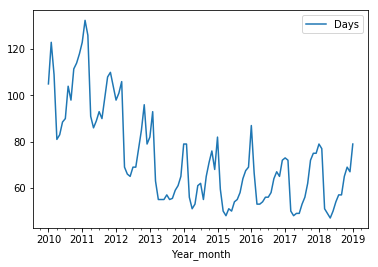

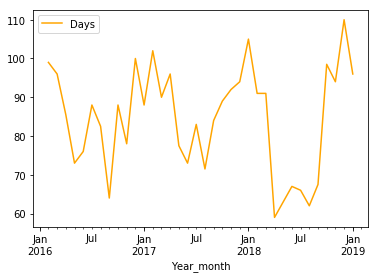

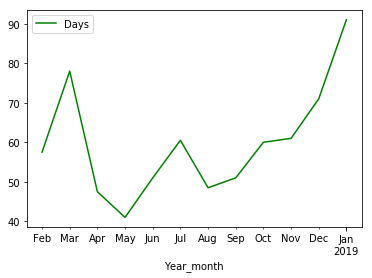

In [125]:
# I'm going to filter out each individual city and then plot the average number of days on the market per city.
tx = tx.sort_values('Year_month', ascending=True)

austin = tx.loc[tx['RegionName'] == "Austin"]
boerne = tx.loc[tx['RegionName'] == "Boerne"]
cp = tx.loc[tx['RegionName'] == "Cedar Park"]
cibolo = tx.loc[tx['RegionName'] == "Cibolo"]
kyle = tx.loc[tx['RegionName'] == "Kyle"]
nb = tx.loc[tx['RegionName'] == "New Braunfels"]
rr = tx.loc[tx['RegionName'] == "Round Rock"]
sa = tx.loc[tx['RegionName'] == "San Antonio"]
uc = tx.loc[tx['RegionName'] == "Universal City"]


austin.plot('Year_month', 'Days')
nb.plot('Year_month', 'Days', color='orange')
uc.plot('Year_month', 'Days', color='green')

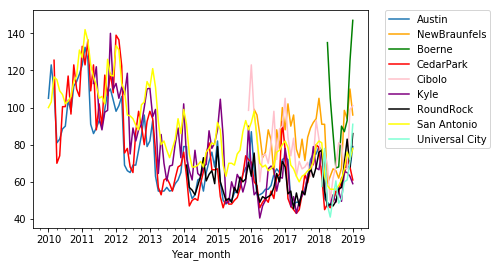

In [126]:
# Doing individual graphs isn't the best way to do this. I want them on one graph.


ax = austin.plot('Year_month', 'Days', label='Austin')
nb.plot('Year_month', 'Days', color='orange', ax=ax, label='NewBraunfels')
boerne.plot('Year_month', 'Days', color='green', ax=ax, label='Boerne')
cp.plot('Year_month', 'Days', color='red', ax=ax, label='CedarPark')
cibolo.plot('Year_month', 'Days', color='pink', ax=ax, label='Cibolo')
kyle.plot('Year_month', 'Days', color='purple', ax=ax, label='Kyle')
rr.plot('Year_month', 'Days', color='black', ax=ax, label='RoundRock')
sa.plot('Year_month', 'Days', color='yellow', ax=ax, label='San Antonio')
uc.plot('Year_month', 'Days', color='aquamarine', ax=ax, label='Universal City')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Hmmm looks like the least number of days typically occurs around March to Sept timeframe. Most likely due to warmer months and no school.  And it looks like the number average number of days on the market has been dropping since 2012-ish.

### Is it better to see in the summer? According to this data, yes!

In [145]:
# Ok, so how long does is take on average to sell a home overall, and per city?
all_avg = tx['Days'].mean()
print(f"Average number of days overall in I-35 cooridor: {all_avg:.2f}")

Average number of days overall in I-35 cooridor: 76.25


In [127]:
tx.head()

,RegionName,Year_month,Days
0,Houston,2010-01-01,141.0
85,Deer Park,2010-01-01,NaN
84,La Porte,2010-01-01,NaN
83,Leander,2010-01-01,NaN
82,Greenville,2010-01-01,NaN


In [150]:
austin_avg = austin["Days"].mean()
print(f"Average number of days properties stay on the market in Austin: {austin_avg:.2f}")

nb_avg = nb["Days"].mean()
print(f"Average number of days properties stay on the market in New Braunfels: {nb_avg:.2f}")

boerne_avg = boerne["Days"].mean()
print(f"Average number of days properties stay on the market in Boerne: {boerne_avg:.2f}")

cp_avg = cp["Days"].mean()
print(f"Average number of days properties stay on the market in Cedar Park: {cp_avg:.2f}")

cibolo_avg = cibolo["Days"].mean()
print(f"Average number of days properties stay on the market in Cibolo: {cibolo_avg:.2f}")

kyle_avg = kyle["Days"].mean()
print(f"Average number of days properties stay on the market in Kyle: {kyle_avg:.2f}")

rr_avg = rr["Days"].mean()
print(f"Average number of days properties stay on the market in Round Rock: {rr_avg:.2f}")

sa_avg = sa["Days"].mean()
print(f"Average number of days properties stay on the market in San Antonio: {sa_avg:.2f}")

uc_avg = uc["Days"].mean()
print(f"Average number of days properties stay on the market in Universal City: {uc_avg:.2f}")

Average number of days properties stay on the market in Austin: 73.23
Average number of days properties stay on the market in New Braunfels: 84.44
Average number of days properties stay on the market in Boerne: 100.35
Average number of days properties stay on the market in Cedar Park: 74.14
Average number of days properties stay on the market in Cibolo: 78.88
Average number of days properties stay on the market in Kyle: 74.29
Average number of days properties stay on the market in Round Rock: 60.00
Average number of days properties stay on the market in San Antonio: 87.94
Average number of days properties stay on the market in Universal City: 59.83


### Looks like it takes less time to sell a house in Universal City. And much longer to sell in Boerne. 

## But what if I want to buy a place? How are the pri